Business & Data Understanding

Genre - the genre of the track <br>
Year - the release year of the recording
Added - the earliest date you added the track to your collection <br>
Beats Per Minute (BPM) - The tempo of the song <br>
Energy - The energy of a song - the higher the value, the more energtic <br>
Danceability - The higher the value, the easier it is to dance to this song <br>
Loudness (dB) - The higher the value, the louder the song <br>
Liveness - The higher the value, the more likely the song is a live recording <br>
Valence - The higher the value, the more positive mood for the song <br>
Length - The duration of the song <br>
Acousticness - The higher the value the more acoustic the song is <br>
Speechiness - The higher the value the more spoken word the song contains <br>
Popularity - The higher the value the more popular the song is <br>
Duration - The length of the song

This is a balanced, multi-class classification algorithm - all genre classifications have equal importance and therefore equal weight.

Data Preparation

Modeling

Evaluation

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, accuracy_score, roc_curve, auc, roc_auc_score, balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [125]:
df = pd.read_excel('spotify_genre_final.xlsx')

In [126]:
df.head()

,Genre,Title,Album_cover_link,Artist,duration_ms,explicit,id,popularity,release_date,release_date_precision,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,rock,Baba O'Riley,https://i.scdn.co/image/ab67616d0000b273fe24dc...,The Who,300400,False,3qiyyUfYe7CRYLucrPmulD,75,1971-08-14,day,...,5,-8.367,1,0.0352,0.31300,0.185000,0.2870,0.150,117.292,4
1,rock,More Than a Feeling,https://i.scdn.co/image/ab67616d0000b27390ef97...,Boston,285133,False,1QEEqeFIZktqIpPI4jSVSF,78,1976,year,...,7,-8.039,1,0.0298,0.00088,0.002300,0.0504,0.285,108.789,4
2,rock,(Don't Fear) The Reaper,https://i.scdn.co/image/ab67616d0000b2733ac318...,Blue Öyster Cult,308120,False,5QTxFnGygVM4jFQiBovmRo,76,1976,year,...,9,-8.550,0,0.0733,0.00290,0.000208,0.2970,0.385,141.466,4
3,rock,Jump - 2015 Remaster,https://i.scdn.co/image/ab67616d0000b273b414c6...,Van Halen,241599,False,7N3PAbqfTjSEU1edb2tY8j,78,1984-01-04,day,...,0,-6.219,1,0.0317,0.17100,0.000377,0.0702,0.795,129.981,4
4,rock,Stairway to Heaven - Remaster,https://i.scdn.co/image/ab67616d0000b273c8a11e...,Led Zeppelin,482830,False,5CQ30WqJwcep0pYcV4AMNc,79,1971-11-08,day,...,9,-12.049,0,0.0339,0.58000,0.003200,0.1160,0.197,82.433,4


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6917 entries, 0 to 6916
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Genre                   6917 non-null   object 
 1   Title                   6917 non-null   object 
 2   Album_cover_link        6917 non-null   object 
 3   Artist                  6917 non-null   object 
 4   duration_ms             6917 non-null   int64  
 5   explicit                6917 non-null   bool   
 6   id                      6917 non-null   object 
 7   popularity              6917 non-null   int64  
 8   release_date            6917 non-null   object 
 9   release_date_precision  6917 non-null   object 
 10  total_tracks            6917 non-null   int64  
 11  danceability            6917 non-null   float64
 12  energy                  6917 non-null   float64
 13  key                     6917 non-null   int64  
 14  loudness                6917 non-null   

In [128]:
df.describe()

,duration_ms,popularity,total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000
mean,230325.976579,60.491543,11.780541,0.663048,0.680214,5.348851,-6.725942,0.584357,0.111231,0.178805,0.034783,0.184376,0.538109,120.034788,3.972531
std,54336.723207,12.944708,8.268982,0.151653,0.173824,3.617507,2.783829,0.492868,0.096413,0.214174,0.138639,0.147764,0.233274,28.015297,0.247247
min,120133.000000,0.000000,1.000000,0.142000,0.084800,0.000000,-20.567000,0.000000,0.022400,0.000002,0.000000,0.013600,0.026000,52.145000,1.000000
25%,193466.000000,53.000000,8.000000,0.562000,0.562000,2.000000,-8.166000,0.000000,0.040600,0.020400,0.000000,0.091600,0.356000,96.571000,4.000000
50%,223733.000000,62.000000,12.000000,0.679000,0.696000,6.000000,-6.258000,1.000000,0.064500,0.088000,0.000002,0.125000,0.546000,120.010000,4.000000
75%,259853.000000,69.000000,16.000000,0.775000,0.818000,8.000000,-4.787000,1.000000,0.157000,0.261000,0.000470,0.236000,0.728000,136.029000,4.000000
max,591693.000000,100.000000,125.000000,0.983000,0.998000,11.000000,0.878000,1.000000,0.399000,0.983000,0.973000,0.979000,0.985000,214.025000,5.000000


In [129]:
## Class Frequency of Target Variable

df['Genre'].value_counts()

pop       1161
rock      1136
latin     1036
hiphop     971
edm        956
rap        926
r&b        731
Name: Genre, dtype: int64

In [130]:
## Baseline Model - Decision Tree

In [131]:
## TRAIN TEST SPLIT

y = df['Genre']
X = df.drop(columns = ['Genre', 'Artist', 'Title', 'Album_cover_link', 'release_date_precision', 'release_date', 'id'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [132]:
## Pre-Processing (Train)

X_train_categoricals = X_train[['explicit', 'key', 'time_signature', 'mode']]
X_train_categoricals['explicit'] = X_train_categoricals.explicit.astype('category')
X_train_categoricals['key'] = X_train_categoricals.key.astype('category')
X_train_categoricals['time_signature'] = X_train_categoricals.time_signature.astype('category')
X_train_categoricals['mode'] = X_train_categoricals['mode'].astype('category')


X_train_dummies = pd.get_dummies(X_train_categoricals, drop_first = True)
X_train_numeric = X_train.drop(columns = X_train_categoricals.columns)

X_train_OHE = pd.concat([X_train_numeric, X_train_dummies], axis = 1)
X_train_OHE

,duration_ms,popularity,total_tracks,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_3,time_signature_4,time_signature_5,mode_1
2773,194750,45,15,0.446,0.732,-6.428,0.0361,0.00767,0.000000,0.1310,...,0,0,0,0,0,0,0,1,0,0
5172,180596,79,1,0.684,0.506,-6.743,0.0338,0.15900,0.000000,0.2600,...,1,0,0,0,0,0,0,1,0,1
726,221640,70,13,0.699,0.502,-12.526,0.0278,0.06070,0.033700,0.3170,...,0,0,0,1,0,0,0,1,0,1
319,194288,64,19,0.415,0.950,-4.676,0.0621,0.00126,0.000039,0.1330,...,0,0,0,0,0,0,0,1,0,1
5382,173600,75,14,0.797,0.844,-5.482,0.2750,0.06510,0.000000,0.0870,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,262800,62,12,0.737,0.890,-8.443,0.1580,0.00556,0.001710,0.0801,...,0,0,0,0,0,0,0,1,0,1
4060,201122,77,15,0.694,0.712,-3.923,0.0460,0.13200,0.000000,0.2110,...,0,1,0,0,0,0,0,1,0,0
1346,208272,59,21,0.705,0.611,-6.772,0.2360,0.03090,0.000000,0.0903,...,0,0,0,0,0,0,0,1,0,0
3454,176093,11,12,0.809,0.550,-11.264,0.0392,0.69000,0.000007,0.1120,...,0,0,0,1,0,0,0,1,0,1


In [133]:
## Pre-Processing (Test)

X_test_categoricals = X_test[['explicit', 'key', 'time_signature', 'mode']]
X_test_categoricals['explicit'] = X_test_categoricals.explicit.astype('category')
X_test_categoricals['key'] = X_test_categoricals.key.astype('category')
X_test_categoricals['time_signature'] = X_test_categoricals.time_signature.astype('category')
X_test_categoricals['mode'] = X_test_categoricals['mode'].astype('category')


X_test_dummies = pd.get_dummies(X_test_categoricals, drop_first = True)
X_test_numeric = X_test.drop(columns = X_test_categoricals.columns)

X_test_OHE = pd.concat([X_test_numeric, X_test_dummies], axis = 1)
X_test_OHE

,duration_ms,popularity,total_tracks,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_3,time_signature_4,time_signature_5,mode_1
4075,186986,81,18,0.697,0.6830,-2.881,0.1170,0.0372,0.000000,0.1370,...,0,0,0,0,0,0,0,1,0,0
6550,201493,70,14,0.332,0.6350,-5.653,0.0898,0.1590,0.000003,0.0599,...,0,1,0,0,0,0,1,0,0,1
6021,298493,47,19,0.889,0.7130,-4.845,0.2280,0.0181,0.000000,0.0715,...,0,0,0,0,0,0,0,1,0,1
1126,165426,69,13,0.380,0.0993,-20.567,0.0509,0.9140,0.000023,0.0605,...,0,0,0,0,0,0,0,1,0,1
5364,338853,75,16,0.375,0.8620,-3.363,0.2550,0.0710,0.000000,0.2110,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,240341,75,14,0.610,0.4580,-11.336,0.3600,0.6960,0.000103,0.0852,...,0,0,0,1,0,0,0,1,0,1
6028,221626,60,20,0.462,0.9440,-2.938,0.3150,0.3120,0.000149,0.3670,...,0,0,1,0,0,0,0,1,0,1
3087,235133,63,20,0.651,0.9120,-3.402,0.2230,0.0969,0.000040,0.1070,...,0,1,0,0,0,0,0,1,0,1
4488,188386,81,11,0.744,0.6190,-9.805,0.0390,0.5980,0.003720,0.2310,...,0,0,0,0,0,0,0,1,0,1


In [134]:
DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
DTC.fit(X_train_OHE, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [135]:
y_pred_train = DTC.predict(X_train_OHE)

balanced_accuracy_score(y_train, y_pred_train)

0.8857016762435178

In [136]:
y_pred_test = DTC.predict(X_test_OHE)

balanced_accuracy_score(y_test, y_pred_test)

0.4033407146280988

In [137]:
y_pred_train_proba = DTC.predict_proba(X_train_OHE)
roc_auc_score(y_train, y_pred_train_proba, multi_class = 'ovr')

0.9933456361031014

In [138]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         edm       0.92      1.00      0.96       743
      hiphop       0.66      1.00      0.80       792
       latin       0.99      1.00      0.99       839
         pop       0.90      0.92      0.91       937
         r&b       0.99      0.80      0.88       576
         rap       1.00      0.49      0.66       748
        rock       1.00      0.99      1.00       898

    accuracy                           0.90      5533
   macro avg       0.92      0.89      0.89      5533
weighted avg       0.92      0.90      0.89      5533



In [139]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         edm       0.63      0.55      0.59       213
      hiphop       0.25      0.35      0.29       179
       latin       0.48      0.46      0.47       197
         pop       0.35      0.42      0.38       224
         r&b       0.29      0.27      0.28       155
         rap       0.21      0.16      0.18       178
        rock       0.68      0.62      0.65       238

    accuracy                           0.42      1384
   macro avg       0.41      0.40      0.41      1384
weighted avg       0.43      0.42      0.42      1384



It looks like the baseline model is performing well on the training data, but not very well on the testing data - which suggests overfitting. Additionally, the model is worst at predicting rap and hip hop, which makes sense because those two genres are very similar. I will consolidate these two genres into one (hiphop_rap) and create a new model to compare performance.

In [140]:
y_train_2 = y_train.replace(['hiphop', 'rap'],'hiphop_rap')

In [145]:
y_test_2 = y_test.replace(['hiphop', 'rap'],'hiphop_rap')
y_test_2.value_counts()

hiphop_rap    357
rock          238
pop           224
edm           213
latin         197
r&b           155
Name: Genre, dtype: int64

In [181]:
DTC2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
DTC2.fit(X_train_OHE, y_train_2)

y_pred_train_2 = DTC2.predict(X_train_OHE)
y_pred_test_2 = DTC2.predict(X_test_OHE)

In [182]:
print(classification_report(y_train_2, y_pred_train_2))

              precision    recall  f1-score   support

         edm       0.92      1.00      0.96       743
  hiphop_rap       0.96      1.00      0.98      1540
       latin       0.99      1.00      0.99       839
         pop       0.92      0.90      0.91       937
         r&b       1.00      0.78      0.88       576
        rock       1.00      0.99      1.00       898

    accuracy                           0.96      5533
   macro avg       0.96      0.95      0.95      5533
weighted avg       0.96      0.96      0.96      5533



In [183]:
print(classification_report(y_test_2, y_pred_test_2))

              precision    recall  f1-score   support

         edm       0.63      0.59      0.61       213
  hiphop_rap       0.75      0.78      0.76       357
       latin       0.51      0.51      0.51       197
         pop       0.33      0.35      0.34       224
         r&b       0.30      0.28      0.29       155
        rock       0.68      0.66      0.67       238

    accuracy                           0.57      1384
   macro avg       0.53      0.53      0.53      1384
weighted avg       0.57      0.57      0.57      1384



Consolidating HipHop and Rap into one class seems to have improved model performance across the board on both training and test sets

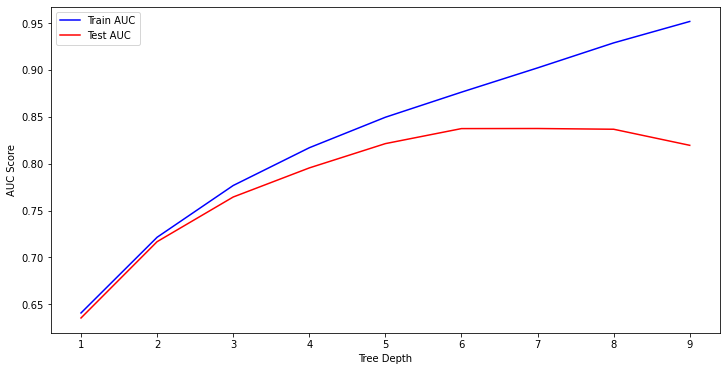

In [156]:
## Tune hyperparameters to adjust for overfitting

max_depth = np.array(range(1,10))

train_results = []
test_results = []

for value in max_depth:
    DTC = DecisionTreeClassifier(criterion = 'entropy', max_depth = value, random_state = 1)
    DTC.fit(X_train_OHE, y_train_2)
    y_pred_train_proba = DTC.predict_proba(X_train_OHE)
    roc_auc = roc_auc_score(y_train_2, y_pred_train_proba, multi_class = 'ovr')
    train_results.append(roc_auc)
    
    y_pred_test_proba = DTC.predict_proba(X_test_OHE)
    roc_auc = roc_auc_score(y_test_2, y_pred_test_proba, multi_class = 'ovr')
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depth, train_results, 'b', label='Train AUC')
plt.plot(max_depth, test_results, 'r', label='Test AUC')
plt.ylabel('AUC Score')
plt.xlabel('Tree Depth')
plt.legend()
plt.show()

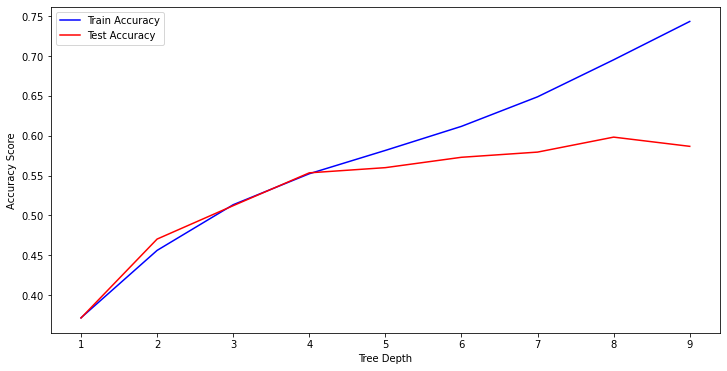

In [162]:
max_depth = np.array(range(1,10))

train_results = []
test_results = []

for value in max_depth:
    DTC = DecisionTreeClassifier(criterion = 'entropy', max_depth = value, random_state = 1)
    DTC.fit(X_train_OHE, y_train_2)
    y_pred_train = DTC.predict(X_train_OHE)
    train_accuracy = accuracy_score(y_train_2, y_pred_train)
    train_results.append(train_accuracy)
    
    y_pred_test = DTC.predict(X_test_OHE)
    test_accuracy = accuracy_score(y_test_2, y_pred_test)
    test_results.append(test_accuracy)

plt.figure(figsize=(12,6))
plt.plot(max_depth, train_results, 'b', label='Train Accuracy')
plt.plot(max_depth, test_results, 'r', label='Test Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Tree Depth')
plt.legend()
plt.show()

In [157]:
DTC3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 1, max_depth = 8)
DTC3.fit(X_train_OHE, y_train_2)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [159]:
y_pred_train_3 = DTC3.predict(X_train_OHE)

print(classification_report(y_train_2, y_pred_train_3))

              precision    recall  f1-score   support

         edm       0.77      0.77      0.77       743
  hiphop_rap       0.81      0.91      0.86      1540
       latin       0.56      0.65      0.60       839
         pop       0.54      0.56      0.55       937
         r&b       0.53      0.35      0.42       576
        rock       0.82      0.68      0.74       898

    accuracy                           0.70      5533
   macro avg       0.67      0.65      0.66      5533
weighted avg       0.69      0.70      0.69      5533



In [160]:
y_pred_test_3 = DTC3.predict(X_test_OHE)

print(classification_report(y_test_2, y_pred_test_3))

              precision    recall  f1-score   support

         edm       0.69      0.61      0.65       213
  hiphop_rap       0.72      0.85      0.78       357
       latin       0.47      0.55      0.51       197
         pop       0.42      0.50      0.46       224
         r&b       0.41      0.25      0.31       155
        rock       0.72      0.57      0.64       238

    accuracy                           0.60      1384
   macro avg       0.57      0.55      0.56      1384
weighted avg       0.60      0.60      0.59      1384



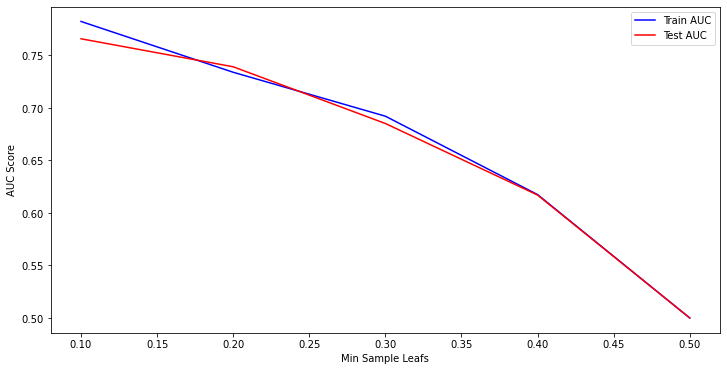

In [170]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    DTC = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = min_samples_leaf, random_state = 1)
    DTC.fit(X_train_OHE, y_train_2)
    y_pred_train_proba = DTC.predict_proba(X_train_OHE)
    roc_auc = roc_auc_score(y_train_2, y_pred_train_proba, multi_class = 'ovr')
    train_results.append(roc_auc)
    
    y_pred_test_proba = DTC.predict_proba(X_test_OHE)
    roc_auc = roc_auc_score(y_test_2, y_pred_test_proba, multi_class = 'ovr')
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC Score')
plt.xlabel('Min Sample Leafs')
plt.legend()
plt.show()

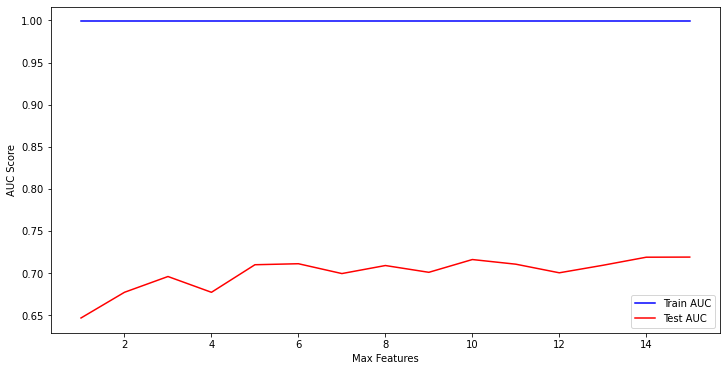

In [171]:
max_features = list(range(1, X_train.shape[1]))

train_results = []
test_results = []

for max_feature in max_features:
    DTC = DecisionTreeClassifier(criterion = 'entropy', max_features = max_feature, random_state = 1)
    DTC.fit(X_train_OHE, y_train_2)
    y_pred_train_proba = DTC.predict_proba(X_train_OHE)
    roc_auc = roc_auc_score(y_train_2, y_pred_train_proba, multi_class = 'ovr')
    train_results.append(roc_auc)
    
    y_pred_test_proba = DTC.predict_proba(X_test_OHE)
    roc_auc = roc_auc_score(y_test_2, y_pred_test_proba, multi_class = 'ovr')
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC Score')
plt.xlabel('Max Features')
plt.legend()
plt.show()

Looks like at around Tree Depth = 8,  is where Test ROC AUC plateaus. Therefore 8 is the optimal Tree Depth that avoids overfitting on the training set and maximizes the model's ability to generalize.

In [161]:
## Model V2 - Random Forest